In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
print(os.getcwd())
os.chdir('../../')
print(os.getcwd())

/home/tasnina/Projects/SynVerse/code/Stat
/home/tasnina/Projects/SynVerse


In [3]:
dataset_dir = "datasets/"
processed_drug_feature_path = dataset_dir + 'processed/drug/'
output_dir = "outputs/"

input_train_dir = "inputs/train/"
input_drug_dir = "inputs/drugs/"

single_drug_training_maccskeys_target_feature_file_path = input_train_dir + 'single_drugs_maccskeys_target_features.tsv'
single_drug_training_maccskeys_feature_file_path = input_train_dir + 'single_drugs_maccskeys_features.tsv'
training_label_synergy_score_file_path =  input_train_dir + 'synergy_labels.tsv'

drugcombdb_drug_chem_smiles_maccskeys_info_file =  os.path.join(processed_drug_feature_path + \
                                                                'drug_chem_smiles_maccskeys_info_file.tsv')
drugbank_drug_target_mapping_file = os.path.join(processed_drug_feature_path, 'drug_target_map_drugbank.tsv')
TTD_drug_target_mapping_file=os.path.join(processed_drug_feature_path,'drug_target_map_TTD.tsv')

TTD_drugbank_drug_target_map_file = os.path.join(input_drug_dir,'drug_target_map.tsv')

drug_pair_score_file = dataset_dir+ 'drug-comb-db/' + 'drugcombs_scored.csv'

drug_pair_response_file = dataset_dir+ 'drug-comb-db/' + 'drugcombs_response.csv'

## Investigate into drug-pairs where drug-1 and drug-2 are the same.

In [6]:
drug_response_df = pd.read_csv(drug_pair_response_file)
print(drug_response_df.columns)

Index(['BlockID', 'Row', 'Col', 'DrugRow', 'DrugCol', 'ConcRow', 'ConcCol',
       'Response', 'ConcRowUnit', 'ConcColUnit', 'source'],
      dtype='object')


In [28]:
# print(drug_response_df.head())
drug_response_df_2_same_drugs_in_pair = drug_response_df[drug_response_df['DrugRow']==drug_response_df['DrugCol']]

print('Number of drug pairs where drug-1 and drug-2 are the same')
print(drug_response_df_2_same_drugs_in_pair.shape[0])

print('Sources of these drug-pairs')
print(drug_response_df_2_same_drugs_in_pair['source'].unique())

df_drop_duplicate = (drug_response_df_2_same_drugs_in_pair[['DrugRow', 'DrugCol']].drop_duplicates())
print(df_drop_duplicate.shape)
print(df_drop_duplicate)

Number of drug pairs where drug-1 and drug-2 are the same
230
Sources of these drug-pairs
['CLOUD' 'nih']
(3, 2)
                         DrugRow                  DrugCol
2426108              CLOFARABINE              CLOFARABINE
6103011              Doxorubicin              Doxorubicin
6103037  Topotecan hydrochloride  Topotecan hydrochloride


In [35]:
drug_pair_df = pd.read_csv(drug_pair_score_file)
print(drug_pair_df.columns)
print('unique drug-pairs: \n', drug_pair_df[[ 'Drug1', 'Drug2', 'Cell line']].drop_duplicates().shape)

# print(drug_response_df.head())
drug_pair_df_2_same_drugs_in_pair = drug_pair_df[drug_pair_df['Drug1']==drug_pair_df['Drug2']]

print('Number of drug pairs where drug-1 and drug-2 are the same: ', drug_pair_df_2_same_drugs_in_pair.shape[0])

df_drop_duplicate = (drug_pair_df_2_same_drugs_in_pair[['Drug1', 'Drug2', 'Cell line']].drop_duplicates())
print(df_drop_duplicate.shape)
df = (df_drop_duplicate.groupby('Cell line').count()['Drug1']).max()
print(df)

Index(['ID', 'Drug1', 'Drug2', 'Cell line', 'ZIP', 'Bliss', 'Loewe', 'HSA'], dtype='object')
unique drug-pairs: 
 (420762, 3)
Number of drug pairs where drug-1 and drug-2 are the same:  382
(288, 3)
18


In [18]:
synergy_file = input_train_dir+'/synergy_labels.tsv'
synergy_df = pd.read_csv(synergy_file, sep = '\t', dtype={'Drug1_pubchem_cid':str,
            'Drug2_pubchem_cid': str, 'Cell_line': str, 'Loewe': np.float64, 'Bliss': np.float64, 'ZIP': np.float64})

In [22]:
print(synergy_df.nunique())
print(len(set(synergy_df['Drug1_pubchem_cid']).union(set(synergy_df['Drug2_pubchem_cid']))))
threshold = 0
synergy_df['Loewe_label'] = synergy_df['Loewe'].astype(np.float64).apply(lambda x: 0 if x<threshold else 1)
synergy_df_filtered = synergy_df[synergy_df['Loewe_label']==1]


print(synergy_df_filtered.nunique())
print(len(set(synergy_df_filtered['Drug1_pubchem_cid']).union(set(synergy_df_filtered['Drug2_pubchem_cid']))))

Drug1_pubchem_cid     1736
Drug2_pubchem_cid      485
Cell_line              121
Loewe                29260
Bliss                24609
ZIP                  24241
Loewe_label              2
dtype: int64
1737
Drug1_pubchem_cid      859
Drug2_pubchem_cid      468
Cell_line              121
Loewe                 9997
Bliss                11501
ZIP                  11565
Loewe_label              1
dtype: int64
871


In [23]:
cell_lines  = synergy_df_filtered['Cell_line'].unique()
drug_pairs_per_cell_line = {x:0 for x in cell_lines}

# synergy_df = synergy_df.reset_index()


for row in synergy_df_filtered.itertuples():
        drug_pairs_per_cell_line[row.Cell_line] += 1

print(drug_pairs_per_cell_line) 

{'DIPG25': 679, 'ED-40515': 96, 'KBM-7': 11904, 'TMD8': 151, 'HDLM-2': 23, 'L-1236': 237, 'U-HO1': 184, 'Huh-7': 10, 'Mak': 10, 'TC-71': 313, 'ACHN': 558, 'SN12C': 628, 'BT-549': 644, 'CAKI-1': 612, 'EKVX': 690, 'HCT-15': 556, 'HT29': 739, 'LOX IMVI': 623, 'MALME-3M': 605, 'OVCAR3': 609, 'SR': 536, 'SW-620': 581, 'T-47D': 937, 'KM12': 569, 'MDA-MB-435': 469, 'PC-3': 658, 'SF-539': 573, 'HCC-2998': 449, 'HCT116': 615, 'HOP-62': 548, 'NCI-H522': 565, 'OVCAR-4': 532, 'TK-10': 564, 'UO-31': 670, 'A498': 562, 'A549': 575, 'COLO 205': 564, 'DU-145': 605, 'HL-60(TB)': 605, 'HS 578T': 605, 'IGROV1': 678, 'K-562': 618, 'MCF7': 672, 'MDA-MB-231': 571, 'MDA-MB-468': 640, 'MOLT-4': 665, 'NCI-H226': 615, 'NCI-H322M': 596, 'NCIH23': 656, 'OVCAR-5': 498, 'OVCAR-8': 629, 'RXF 393': 640, 'SK-MEL-28': 596, 'SK-MEL-5': 430, 'SK-OV-3': 753, 'SNB-19': 532, 'SNB-75': 534, 'U251': 562, 'UACC62': 729, 'HOP-92': 555, 'SF-268': 580, 'SK-MEL-2': 419, 'UACC-257': 555, 'CCRF-CEM': 481, 'NCI-H460': 761, 'M14': 452,

[1, 2, 2, 4, 4, 4, 4, 4, 10, 10, 10, 10, 18, 23, 46, 62, 68, 69, 74, 96, 114, 139, 144, 150, 150, 151, 154, 159, 161, 161, 164, 164, 165, 165, 166, 167, 170, 172, 173, 177, 178, 181, 181, 184, 184, 186, 190, 195, 201, 207, 207, 211, 237, 251, 270, 284, 313, 340, 347, 419, 430, 449, 452, 469, 481, 498, 522, 532, 532, 534, 536, 547, 548, 555, 555, 556, 558, 562, 562, 564, 564, 565, 569, 571, 573, 575, 580, 581, 588, 596, 596, 605, 605, 605, 605, 609, 612, 615, 615, 618, 623, 628, 629, 640, 640, 644, 654, 656, 658, 665, 670, 672, 678, 679, 690, 729, 739, 753, 761, 937, 11904]


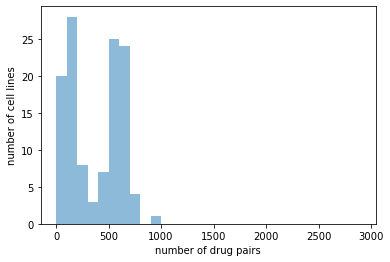

In [24]:
#plot_hist
number_of_drug_pairs_list = list((drug_pairs_per_cell_line.values()))
number_of_drug_pairs_list.sort()
print(number_of_drug_pairs_list)

bins_seq = list(np.arange(0,3000,100))
# bins_seq = bins_seq+[20000,30000,40000,50000]

# print(bins_seq)

fig, ax = plt.subplots()
ax.hist(drug_pairs_per_cell_line.values(),bins=bins_seq,alpha=0.5,label='#total drug pairs')
# y_label = 'number of cell lines (' + str(len(number_of_drug_pairs_list)) + ')'
y_label = 'number of cell lines'
x_label = 'number of drug pairs'

ax.set_ylabel(y_label)
ax.set_xlabel(x_label)
# ax.legend()

# plt.title('#drug combinations per cell line for which all feature values are available')
file_name = output_dir+'/Viz/'+ 'drug_pairs_per_cell_line.pdf'
os.makedirs(os.path.dirname(file_name), exist_ok=True)
plt.savefig(file_name, format= 'pdf', bbox_inches = 'tight' )
plt.show()
